In [1]:

import os
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn_utils import classify_data, sample_size_impact, search_params

FILENAME = "detect.csv"
model_type = "nb"

In [4]:

FILENAME = "detect.csv"
model_type = "nb"

# load sample data
data = pd.read_csv(os.path.join(os.curdir, "data", FILENAME))
print(data.head())

# separate into train and test
x_train, x_test, y_train, y_test = train_test_split(data["text"], data["label"], 
                                                    test_size=0.3, 
                                                    random_state=0)


                                                text  label
0  The Twelfth Man (also known as The 12th Man) i...      0
1  Esther Mona Friesner-Stutzman, née Friesner (b...      0
2  Creolization is the process through which creo...      0
3  Charlie Phillips (born July 2, 1937) is an Ame...      1
4  A Friendly Husband is a 1923 American silent c...      0


# Impact of Tokenizer

Default Tokenizer

              precision    recall  f1-score   support

           0       0.72      0.91      0.80      2968
           1       0.88      0.65      0.75      3032

    accuracy                           0.78      6000
   macro avg       0.80      0.78      0.77      6000
weighted avg       0.80      0.78      0.77      6000



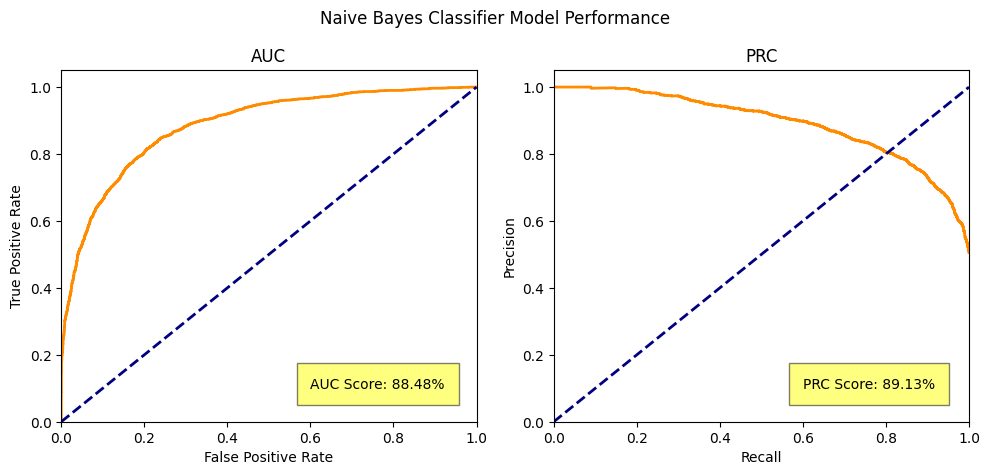

Custom Tokenizer; stopwords = 'english'

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      2968
           1       0.86      0.65      0.74      3032

    accuracy                           0.77      6000
   macro avg       0.79      0.77      0.77      6000
weighted avg       0.79      0.77      0.77      6000



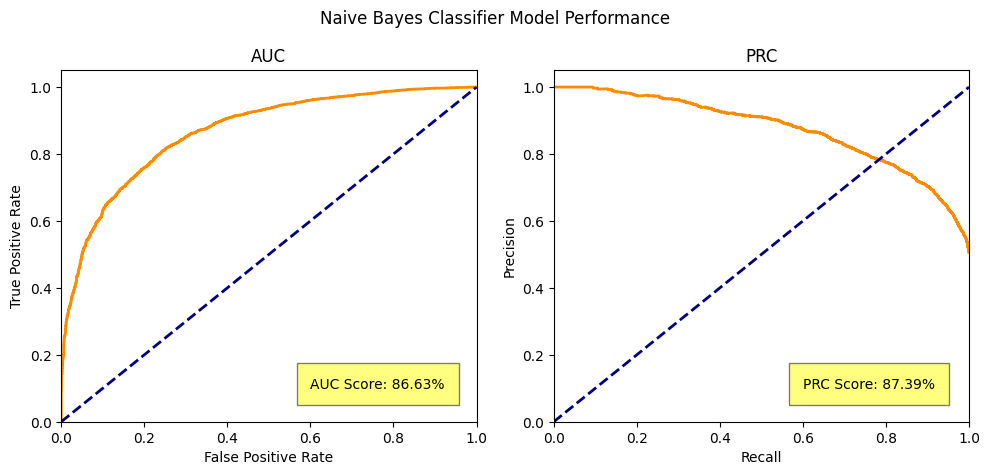

In [3]:

# default tokenizer
print("Default Tokenizer\n")
_ = classify_data(x_train, y_train, x_test, y_test, 
            model_type=model_type, 
            min_df=1, 
            stop_words=None,
            algorithm_para=1.0)

# custom tokenizer
print("Custom Tokenizer; stopwords='english'\n")
_ = classify_data(x_train, y_train, x_test, y_test, 
            model_type=model_type, 
            min_df=1, 
            stop_words="english",
            algorithm_para=1.0)

# Optimize with Grid Search

Optimal Grid Search Parameters:
Best f1 score = 0.795
Min. DF = 5
Stopwords = None
Classifier Hyper-parameter: 1

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2968
           1       0.83      0.77      0.80      3032

    accuracy                           0.80      6000
   macro avg       0.81      0.80      0.80      6000
weighted avg       0.81      0.80      0.80      6000



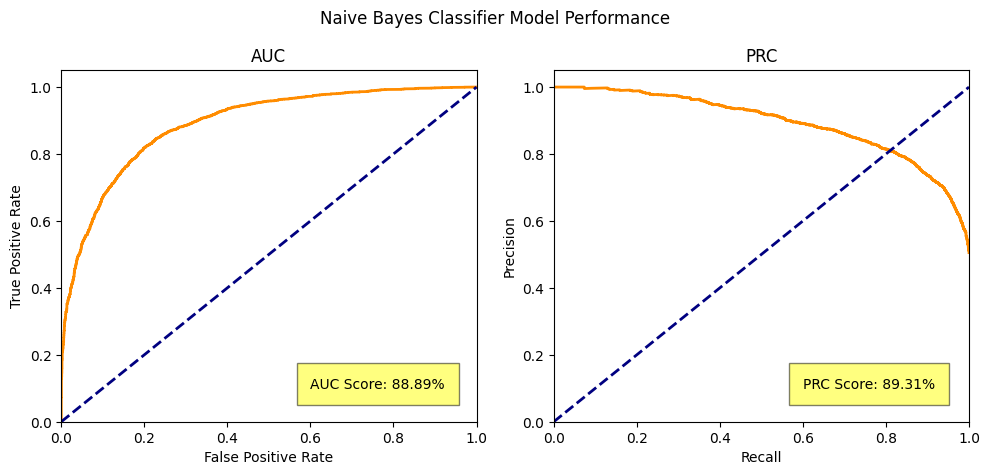

In [4]:

min_df, stop_words, C = search_params(x_train, y_train, clf=model_type)

_ = classify_data(x_train, y_train, x_test, y_test, 
            model_type=model_type, 
            min_df=min_df, 
            stop_words=stop_words,
            algorithm_para=C)


# Impact of Sample Size

Training sample size: 0.1
              precision    recall  f1-score   support

           0       0.62      0.97      0.76      8996
           1       0.93      0.41      0.57      9004

    accuracy                           0.69     18000
   macro avg       0.77      0.69      0.66     18000
weighted avg       0.77      0.69      0.66     18000



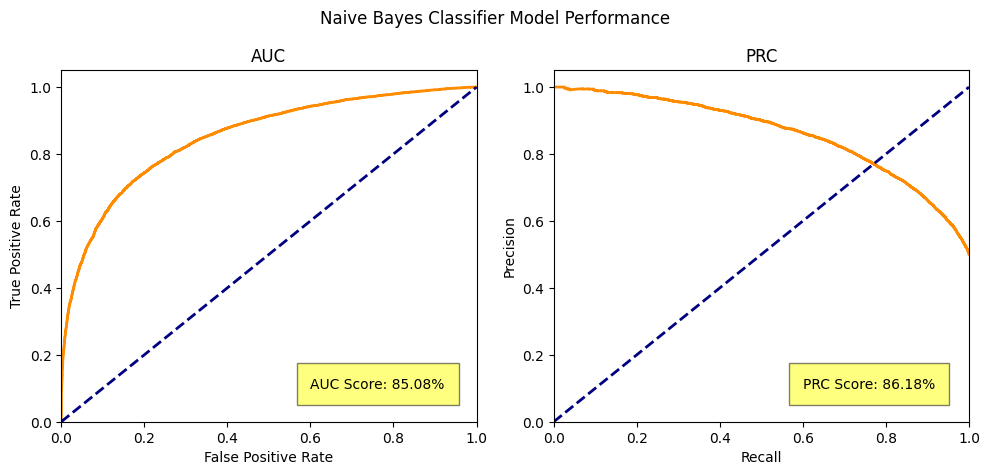

Training sample size: 0.2
              precision    recall  f1-score   support

           0       0.61      0.98      0.75      7966
           1       0.95      0.38      0.54      8034

    accuracy                           0.68     16000
   macro avg       0.78      0.68      0.65     16000
weighted avg       0.78      0.68      0.65     16000



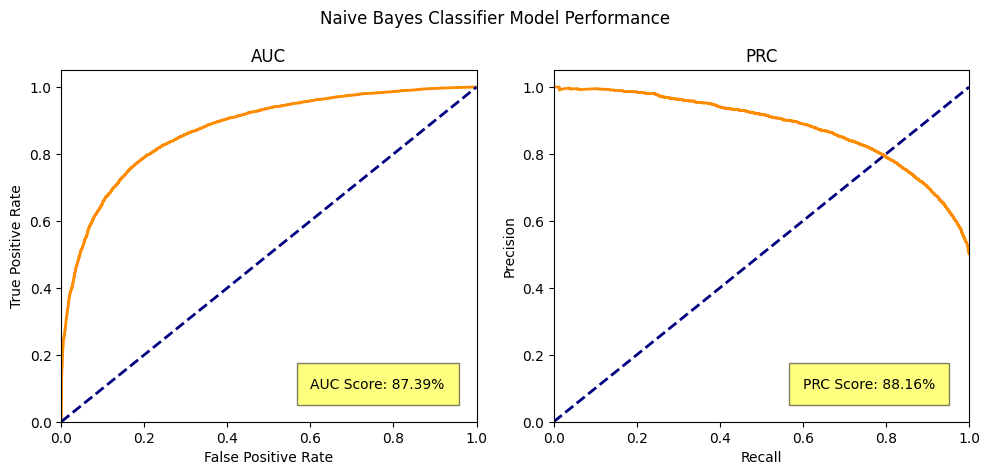

Training sample size: 0.3
              precision    recall  f1-score   support

           0       0.65      0.96      0.77      6985
           1       0.92      0.48      0.63      7015

    accuracy                           0.72     14000
   macro avg       0.78      0.72      0.70     14000
weighted avg       0.78      0.72      0.70     14000



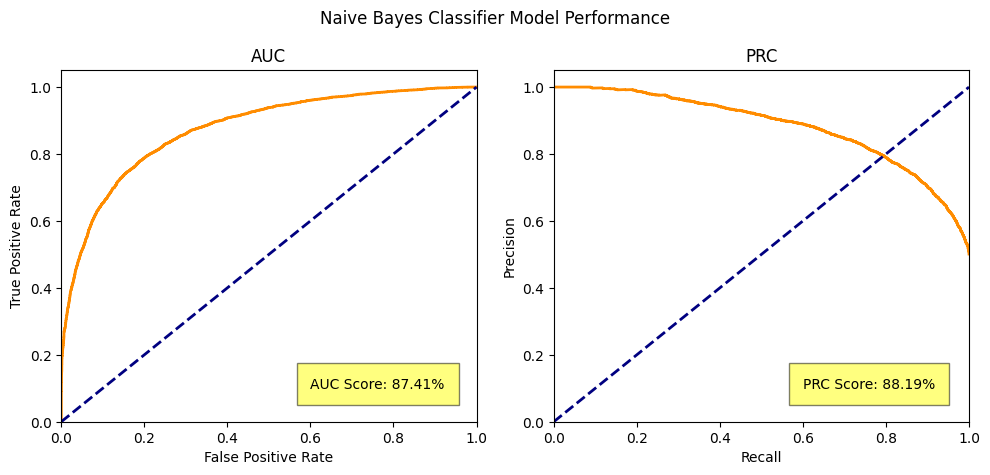

Training sample size: 0.4
              precision    recall  f1-score   support

           0       0.65      0.96      0.77      5959
           1       0.92      0.49      0.64      6041

    accuracy                           0.72     12000
   macro avg       0.79      0.72      0.71     12000
weighted avg       0.79      0.72      0.71     12000



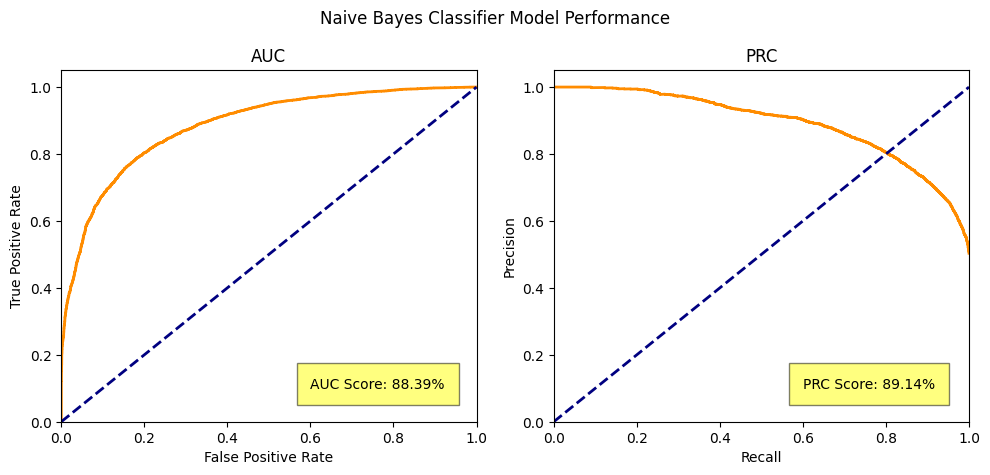

Training sample size: 0.5
              precision    recall  f1-score   support

           0       0.68      0.95      0.79      4976
           1       0.91      0.56      0.69      5024

    accuracy                           0.75     10000
   macro avg       0.80      0.75      0.74     10000
weighted avg       0.80      0.75      0.74     10000



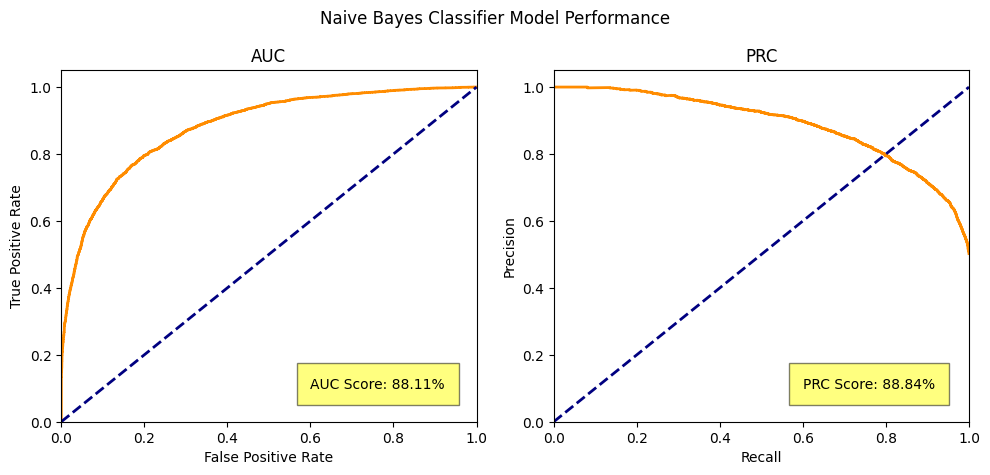

Training sample size: 0.6
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      3967
           1       0.90      0.60      0.72      4033

    accuracy                           0.77      8000
   macro avg       0.80      0.77      0.76      8000
weighted avg       0.80      0.77      0.76      8000



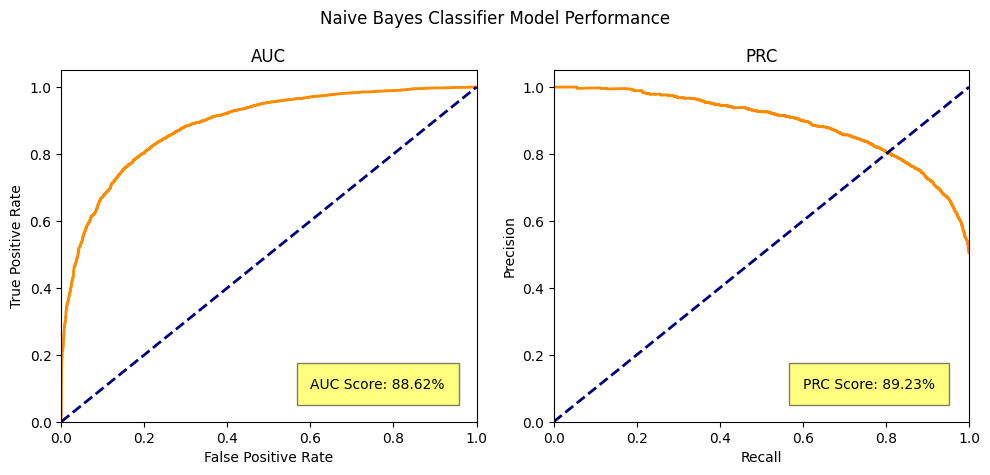

Training sample size: 0.7
              precision    recall  f1-score   support

           0       0.72      0.91      0.80      2968
           1       0.88      0.65      0.75      3032

    accuracy                           0.78      6000
   macro avg       0.80      0.78      0.77      6000
weighted avg       0.80      0.78      0.77      6000



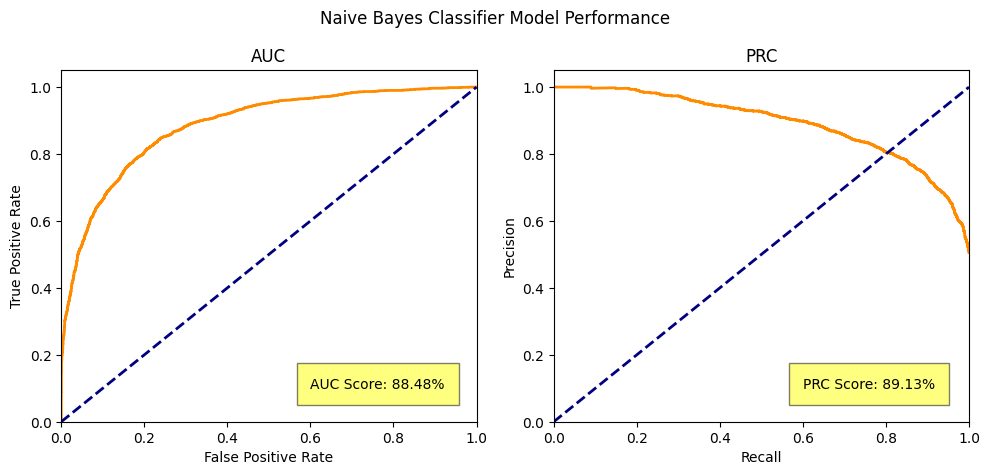

Training sample size: 0.8
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1966
           1       0.86      0.70      0.77      2034

    accuracy                           0.79      4000
   macro avg       0.80      0.79      0.79      4000
weighted avg       0.80      0.79      0.79      4000



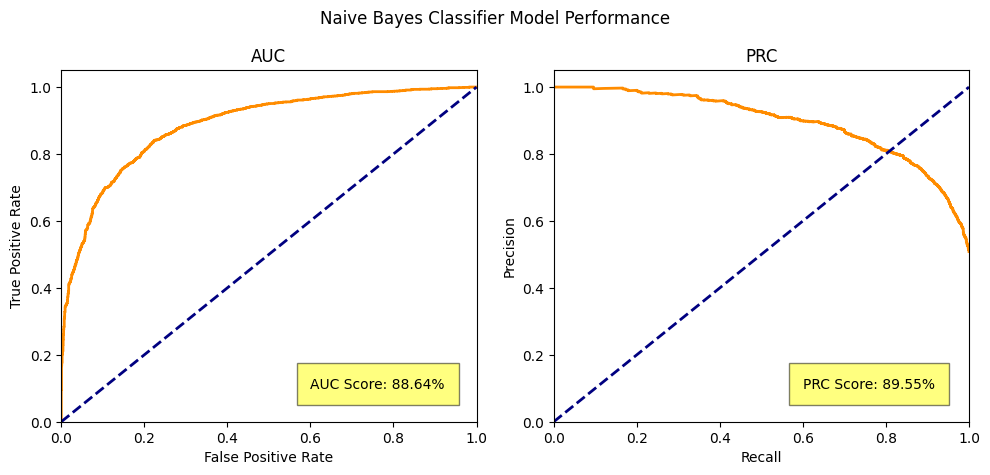

Training sample size: 0.9
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       987
           1       0.82      0.76      0.79      1013

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



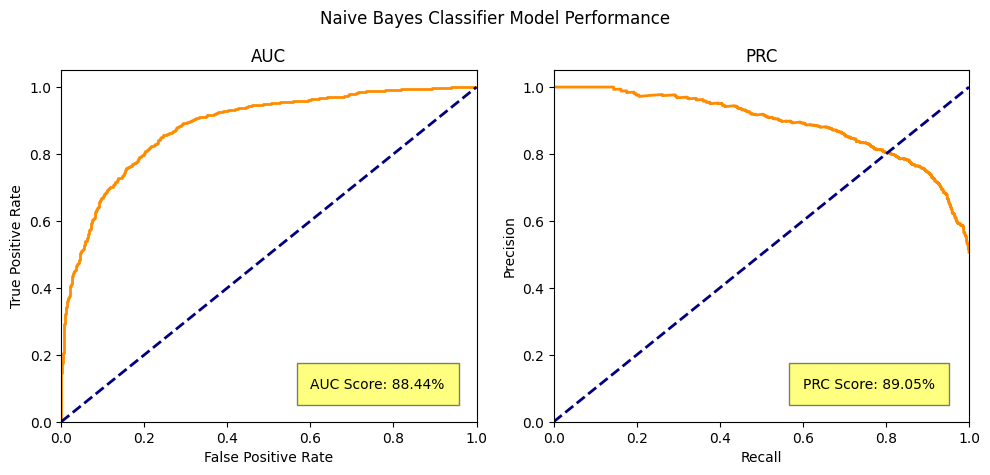

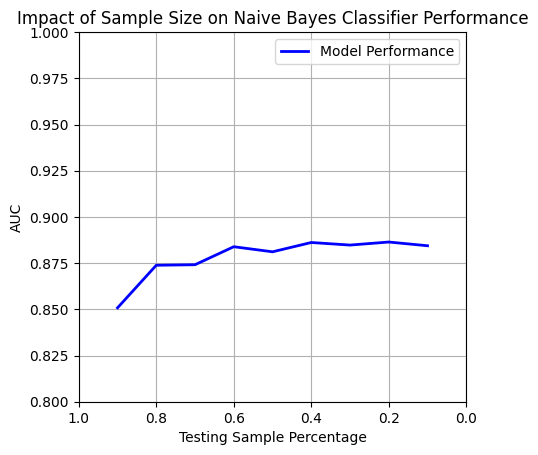

In [5]:

sample_size_impact(data["text"], data["label"], model_type)
